In [2]:
import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

# 1. Data Loading

In [3]:
## Load the Amtrak data and convert them to be suitable for time series analysis
Amtrak_df = pd.read_csv('Amtrak.csv', squeeze=True)
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month)
Amtrak_df.head(9)

,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-01-02
2,01/03/1991,1972.715,1991-01-03
3,01/04/1991,1811.665,1991-01-04
4,01/05/1991,1974.964,1991-01-05
5,01/06/1991,1862.356,1991-01-06
6,01/07/1991,1939.860,1991-01-07
7,01/08/1991,2013.264,1991-01-08
8,01/09/1991,1595.657,1991-01-09


In [4]:
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)
ridership_ts

Date
1991-01-01    1708.917
1991-01-02    1620.586
1991-01-03    1972.715
1991-01-04    1811.665
1991-01-05    1974.964
                ...   
2003-01-11    2076.054
2003-01-12    2140.677
2004-01-01    1831.508
2004-01-02    1838.006
2004-01-03    2132.446
Length: 159, dtype: float64

In [5]:
## Boston housing data
housing_df = pd.read_csv('BostonHousing.csv')
housing_df = housing_df.rename(columns= {'CAT.MEDV':'CAT_MEDV'})
housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


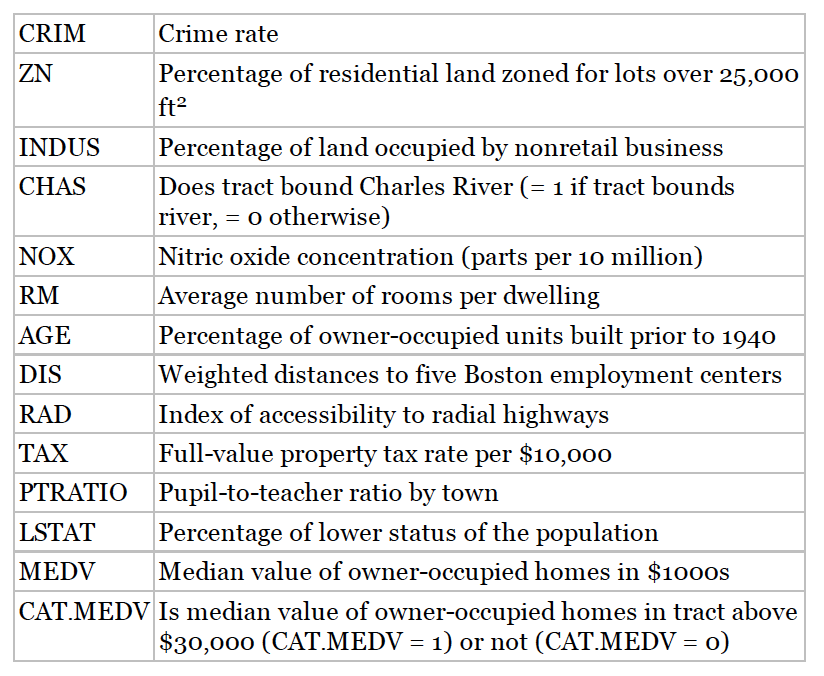

In [6]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image('BostonHousing_description.png')

We consider three possible tasks:
1. A supervised predictive task, where the outcome variable of interest is the median value of a home in the tract (MEDV).
2. A supervised classification task, where the outcome variable of interest is the binary variable CAT.MEDV that indicates whether the home value is above or below $30,000.
3. An unsupervised task, where the goal is to cluster census tracts.

# Basic Chart 

All three basic plots highlight global information such as the overall level of ridership or MEDV
as well as,
- changes over time (line chart)
- differences between subgroups (bar chart)
- relationships between numerical variables (scatter plot).


In supervised learning, there will be more focus on the outcome variable. In scatter plots, the outcome variable is typically associated with the y-axis. 
In unsupervised learning (for the purpose of data reduction or clustering), basic plots that convey relationships (such as scatter plots) are preferred.


## 1. Line graph

Text(0, 0.5, 'Ridership (in 000s)')

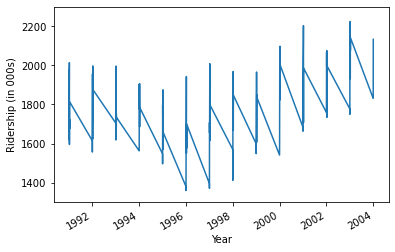

In [7]:
## Pandas version
ridership_ts.plot(ylim=[1300, 2300], legend=False)
plt.xlabel('Year') # set x-axis label
plt.ylabel('Ridership (in 000s)') # set y-axis label

Text(0, 0.5, 'Ridership (in 000s)')

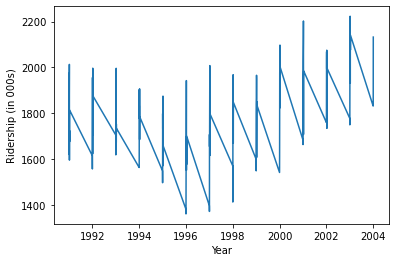

In [8]:
## matplotlib version 
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year') # set x-axis label
plt.ylabel('Ridership (in 000s)') # set y-axis label

## 2. Scatter plot

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

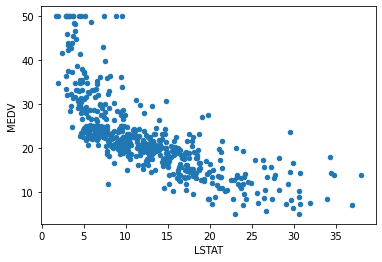

In [9]:
## Pandas version 
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

Text(0, 0.5, 'MEDV')

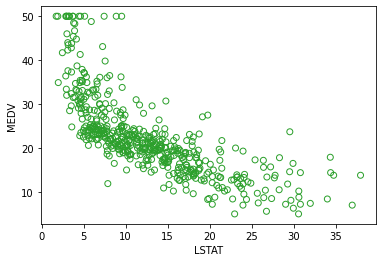

In [10]:
## matplotlib version 
## Set the color of the points in the scatterplot and draw as open circles.
plt.scatter(housing_df.LSTAT, housing_df.MEDV, color='C2', facecolor='none')
plt.xlabel('LSTAT'); plt.ylabel('MEDV')

This displays a scatter plot of MEDV vs. LSTAT. This is an important plot in the prediction task. Note that the output MEDV is again on the y-axis (and LSTAT on the x-axis is a potential predictor).

Because both variables in a basic scatter plot must be numerical, it cannot be used to display the relation between CAT.MEDV and potential predictors for the classification task. For unsupervised learning, this particular scatter plot helps study the association between **two numerical variables** in terms of information overlap as well as identifying clusters of observations.

## 3-1. Barchart (a bar chart for a numerical variable (MEDV))

Text(0, 0.5, 'Avg. MEDV')

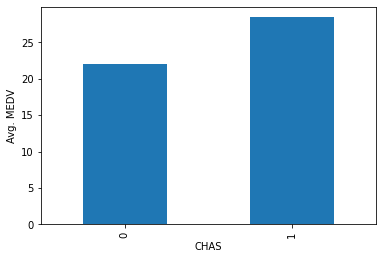

In [11]:
## barchart of CHAS vs. mean MEDV
## pandas version
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar')
ax.set_ylabel('Avg. MEDV')

<ipython-input-12-2fb24f24b92c>:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0, 1], False)


Text(0, 0.5, 'Avg. MEDV')

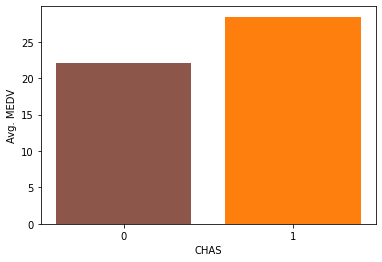

In [12]:
## matplotlib version 
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')

separate bars are used to denote homes in Boston that are near the Charles River vs. those that are not (thereby
comparing the two categories of CHAS). The chart with the numerical output MEDV (Figure 3.1 c) uses the average MEDV on the y-axis.

This supports the **predictive task**: the numerical outcome is on the y-axis and the x-axis is used for a potential categorical predictor. (Note that the x-axis on a bar chart must be used only for categorical variables, because the order of bars in a bar chart should be interchangeable.)

## 3-2. Barchart (a bar chart for a categorical variable (CAT.MEDV).)

Text(0, 0.5, '% of CAT_MEDV')

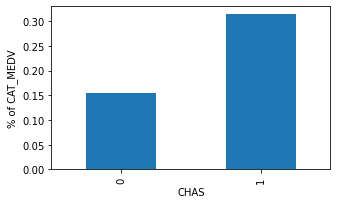

In [13]:
## barchart of CHAS vs. CAT_MEDV
## pandas version
dataForPlot = housing_df.groupby('CHAS').mean()['CAT. MEDV']
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('% of CAT_MEDV')

<ipython-input-14-2ed14c49bdd4>:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0, 1], False)


Text(0, 0.5, '% of CAT_MEDV')

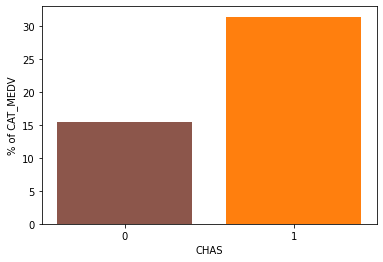

In [14]:
## barchart of CHAS vs. CAT.MEDV
dataForPlot = housing_df.groupby('CHAS').mean()['CAT. MEDV'] * 100
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('CHAS'); ax.set_ylabel('% of CAT_MEDV')

For the **classification task**, the y-axis indicates the percent of tracts with median value above $30K and the x-axis is a binary variable indicating proximity to the Charles. This plot shows us that the tracts bordering the Charles are much more likely to have median values above $30K.

# Distribution Plots: Boxplots and Histograms

The boxplot and the histogram are two plots that display the entire distribution of a **numerical variable**. Distribution plots are useful in **supervised learning** for determining potential data mining methods and variable transformations.

Whereas bar charts can only use a single aggregation, boxplots and histograms display the entire distribution of a numerical variable. 
- Boxplots are also effective for comparing subgroups by generating side-by-side boxplots, or for looking at distributions over time by creating a series of boxplots.
- A histogram represents the frequencies of all x values with a series of vertical connected bars.

## 1. Histograms

Text(0, 0.5, 'count')

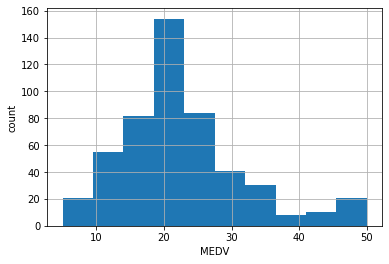

In [15]:
## histogram of MEDV
## Pandas version
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV'); ax.set_ylabel('count')

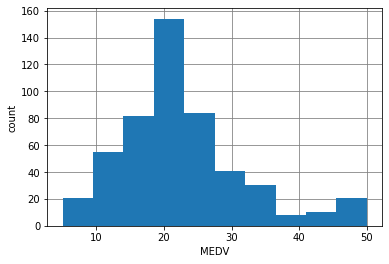

In [16]:
# matplotlib version
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True) # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='-')
ax.set_xlabel('MEDV'); ax.set_ylabel('count')
plt.show()

## 2. Boxplot

Text(0.5, 1.0, '')

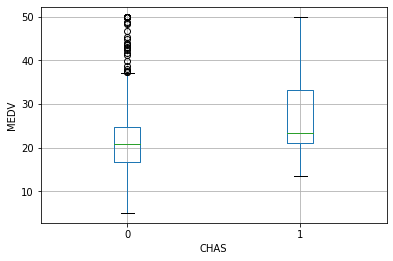

In [17]:
## Pandas version
## boxplot of MEDV for different values of CHAS
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle("") # Suppress the titles
plt.title("")

<ipython-input-18-093b2b3fa9a4>:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([1, 2], False)


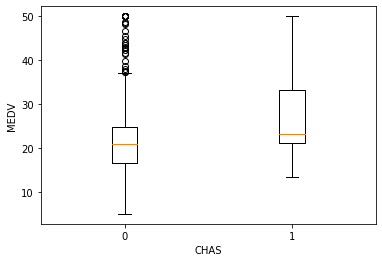

In [18]:
# Matplotlib version
dataForPlot = [list(housing_df[housing_df.CHAS==0].MEDV),
list(housing_df[housing_df.CHAS==1].MEDV)]
fig, ax = plt.subplots()
ax.boxplot(dataForPlot)
ax.set_xticks([1, 2], False)
ax.set_xticklabels([0, 1])
ax.set_xlabel('CHAS'); ax.set_ylabel('MEDV')
plt.show()

There are two boxplots(called a side-by-side boxplot). The box encloses 50% of the data — for example, in the right-hand box, half of the tracts have median values (MEDV) between $20,000 and $33,000. The horizontal line inside
the box represents the median (50th percentile). The top and bottom of the box represent the 75th and 25th percentiles, respectively. Lines extending above and below the box cover the rest of the data range; outliers may be depicted as points or circles. Sometimes the average is marked by a + (or similar) sign. Comparing the average and the
median helps in assessing how skewed the data are. 

Because histograms and boxplots are geared toward numerical variables, their basic form is useful for **prediction tasks**. Boxplots can also support **unsupervised learning** by displaying relationships between a numerical variable (y-axis) and a categorical variable (xaxis).

Figure 3.2 b shows side-by-side boxplots comparing the distribution of MEDV for homes that border the Charles River (1) or not (0). We see that not only is the average MEDV for river-bounding homes higher than the non-river-bounding homes, but also the entire distribution is higher (median, quartiles, min, and max). We can also see that all river-bounding homes have MEDV above $10K, unlike non-river-bounding homes. This information is useful for identifying the potential importance of this predictor(CHAS), and for choosing data mining methods that can capture the non-overlapping area between the two distributions (e.g., trees).

## +) side-by-side boxplots

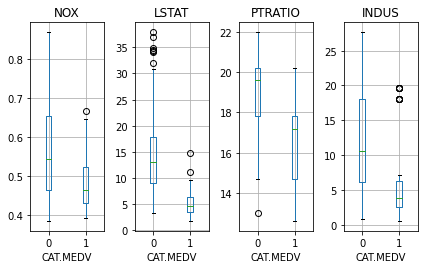

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column='NOX', by='CAT. MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT. MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT. MEDV',ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT. MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle("") # Suppress the overall title
plt.tight_layout() # Increase the separation between the plots

Side-by-side boxplots for exploring the CAT.MEDV output variable by different numerical predictors. 

IN A SIDE-BYSIDE BOXPLOT, ONE AXIS IS USED FOR **A CATEGORICAL VARIABLE**, AND THE OTHER FOR **A NUMERICAL VARIABLE**.
Plotting a CATEGORICAL OUTCOME VARIABLE and a numerical predictor compares the predictor’s distribution across the outcome categories. Plotting a NUMERICAL OUTCOME VARIABLE and a categorical predictor displays THE DISTRIBUTION OF THE
OUTCOME VARIABLE across different levels of the predictor.

# Heatmaps: Visualizing Correlations and Missing Values

A heatmap is a graphical display of numerical data where color is used to denote values. In a data mining context, heatmaps are especially useful for two purposes: 1) for visualizing correlation tables and 2) for visualizing missing values in the data. 

In both cases, the information is conveyed in a two-dimensional table. A correlation table for p variables has p rows and p columns. A data table contains p columns (variables) and n rows (observations). 

## Heatmap of a correlation table

<AxesSubplot:>

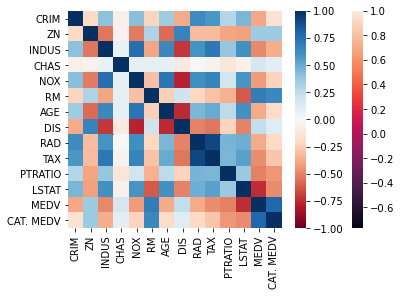

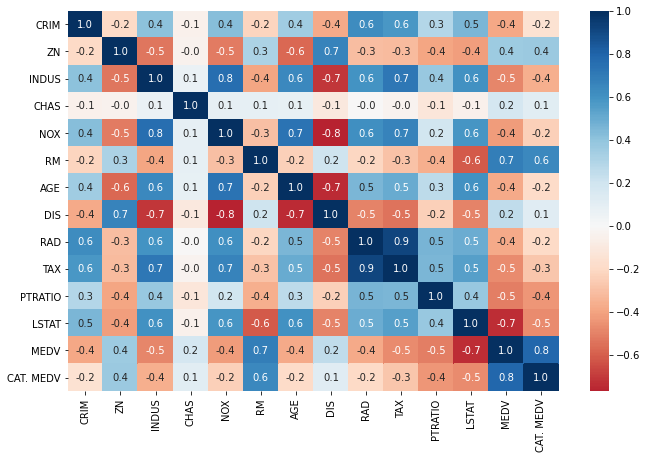

In [20]:
## simple heatmap of correlations (without values)
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")
# Include information about values (example demonstrate how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu",center=0, ax=ax)

An example of a correlation table heatmap is shown in Figure 3.4, showing all the pairwise correlations between 13 variables (MEDV and 12 predictors). Darker shades correspond to stronger (positive or negative) correlation. It is easy to quickly spot the high and low correlations. The use of blue/red is used in this case to highlight positive vs. negative correlations.

## Heatmap of missing values

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 [Text(0.5, 0, 'DATE'),
  Text(1.5, 0, 'TIME'),
  Text(2.5, 0, 'BOROUGH'),
  Text(3.5, 0, 'ZIP CODE'),
  Text(4.5, 0, 'LATITUDE'),
  Text(5.5, 0, 'LONGITUDE'),
  Text(6.5, 0, 'LOCATION'),
  Text(7.5, 0, 'ON STREET NAME'),
  Text(8.5, 0, 'CROSS STREET NAME'),
  Text(9.5, 0, 'OFF STREET NAME'),
  Text(10.5, 0, 'NUMBER OF PERSONS INJURED'),
  Text(11.5, 0, 'NUMBER OF PERSONS KILLED'),
  Text(12.5, 0, 'NUMBER OF PEDESTRIANS INJURED'),
  Text(13.5, 0, 'NUMBER OF PEDESTRIANS KILLED'),
  Text(14.5, 0, 'NUMBER OF CYCLIST INJURED'),
  Text(15.5, 0, 'NUMBER OF CYCLIST KILLED'),
  Text(16.5, 0, 'NUMBER OF MOTORIST INJURED'),
  Text(17.5, 0, 'NUMBER OF MOTORIST KILLED'),
  Text(18.5, 0, 'CONTRIBUTING FACTOR VEHICLE 1'),
  Text(19.5, 0, 'CONTRIBUTING FACTOR VEHICLE 2'),
  Text(20.5, 0, 'CONTRIBUTING FA

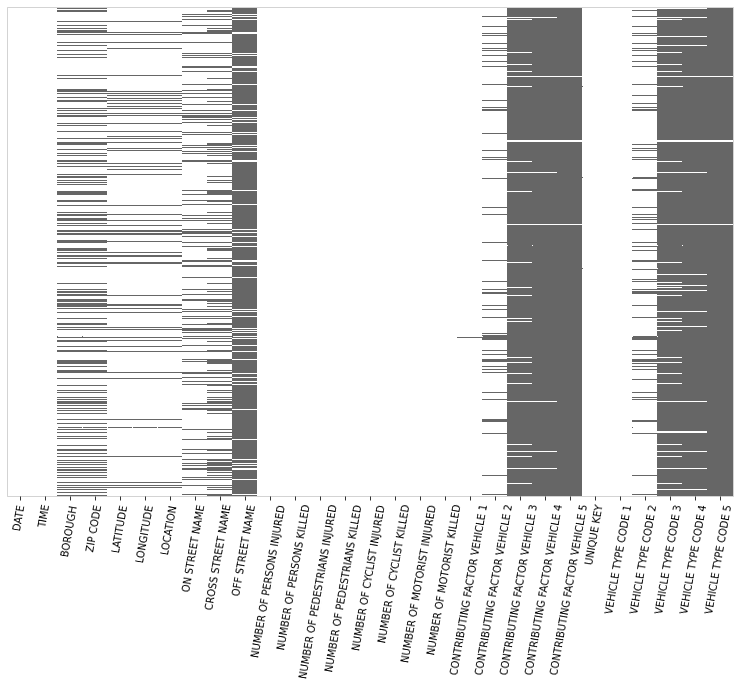

In [21]:
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions_1000.csv').sort_values(['DATE'])
# given a dataframe df create a copy of the array that is 0 if a field contains a value and 1 for NaN
naInfo = np.zeros(df.shape)
naInfo[df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=df.columns)
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=['white', '#666666'], cbar=False, ax=ax)
ax.set_yticks([])
# draw frame around figure
rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0],
linewidth=1, edgecolor='lightgrey', facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)
plt.xticks(rotation=80)

In a missing value heatmap, rows correspond to records and columns to variables. We use a binary coding of the original dataset where 1 denotes a missing value and 0 otherwise. This new binary table is then colored such that only missing value cells (with value 1) are colored. 

Figure 3.5 shows an example of a missing value heatmap for a dataset on motor vehicle collisions. The missing data heatmap helps visualize the level and amount of “missingness” in the dataset.

# Multidimensional Visualization

## 1. Scatter plot of two numerical predictors, color-coded by the categorical outcome CAT.MEDV.

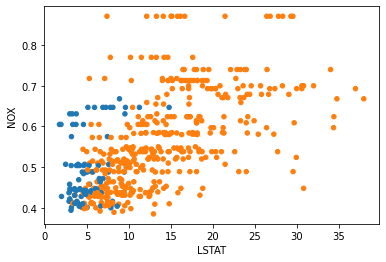

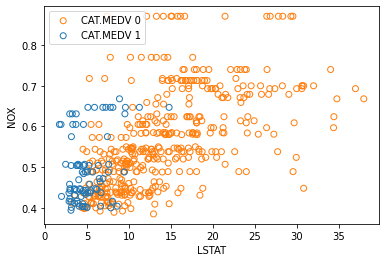

In [22]:
# Color the points by the value of CAT.MEDV
housing_df.plot.scatter(x='LSTAT', y='NOX', c=['C0' if c == 1 else 'C1' for c in housing_df['CAT. MEDV']])
# Plot first the data points for CAT.MEDV of 0 and then of 1
# Setting color to ’none’ gives open circles
_, ax = plt.subplots()
for catValue, color in (0, 'C1'), (1, 'C0'):
    subset_df = housing_df[housing_df['CAT. MEDV'] == catValue]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color='none', edgecolor=color)
ax.set_xlabel('LSTAT')
ax.set_ylabel('NOX')
ax.legend(['CAT.MEDV 0', 'CAT.MEDV 1'])
plt.show()


## 2. Bar chart of MEDV by two categorical predictors (CHAS and RAD), using multiple panels for CHAS

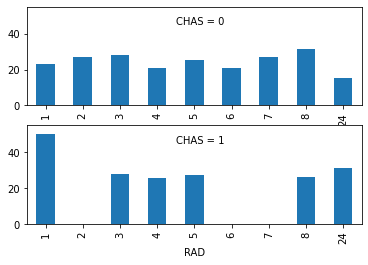

In [23]:
## panel plots
# compute mean MEDV per RAD and CHAS
dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']
dataForPlot_df
# We determine all possible RAD values to use as ticks
ticks = set(housing_df.RAD)
for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0
# reorder to rows, so that the index is sorted
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]
# Determine a common range for the y axis
yRange = [0, max(dataForPlot_df) * 1.1]
fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange)
axes[0].annotate('CHAS = 0', xy=(3.5, 45))
axes[1].annotate('CHAS = 1', xy=(3.5, 45))
plt.show()

We see that the average MEDV for different highway accessibility levels (RAD) behaves differently for homes near the river (lower panel) compared to homes away from the river (upper panel). This is especially salient for RAD = 1. We also see that there are no near-river homes in RAD levels 2, 6, and 7. Such information might lead us to create an
interaction term between RAD and CHAS, and to consider condensing some of the bins in RAD. All these explorations are useful for prediction and classification.

## 3. scatter plot matrix

The scatter plot matrix is useful in **unsupervised learning for studying the associations between numerical variables**, detecting outliers and identifying clusters. For supervised learning, it can be used for examining pairwise relationships (and their nature) between predictors to support variable transformations and variable
selection (see Correlation Analysis in Chapter 4). For prediction, it can also be used to depict the relationship of the outcome with the numerical predictors.

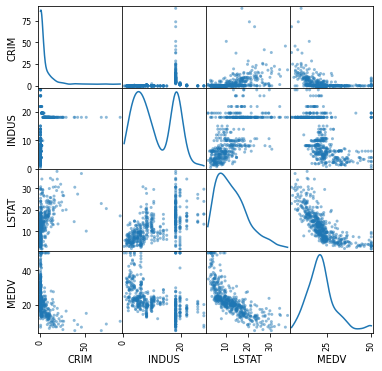

In [24]:
# Display scatterplots between the different variables
# The diagonal shows the distribution for each variable
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6),diagonal='kde')
corr = df.corr().values
plt.show()

Variable name indicates the y-axis variable. For example, the plots in the bottom row all have MEDV on the y-axis (which allows studying the individual outcome–predictor relations). We can see different types of relationships from the different shapes (e.g., an exponential relationship between MEDV and LSTAT and a highly skewed relationship between CRIM and INDUS), which can indicate needed transformations. Along the diagonal, where just a single variable is involved, the frequency distribution for that variable is displayed. The scatterplots above the diagonal contain the correlation coefficients corresponding to the two variables.

# Manipulations: Rescaling, Aggregation and Hierarchies, Zooming, Filtering

This preprocessing step in data mining includes variable transformation and derivation of new variables to help models perform more effectively. Transformations include changing the numeric scale of a variable, binning numerical variables, and condensing categories in categorical variables.

## Rescaling

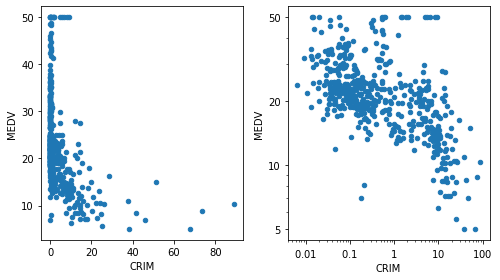

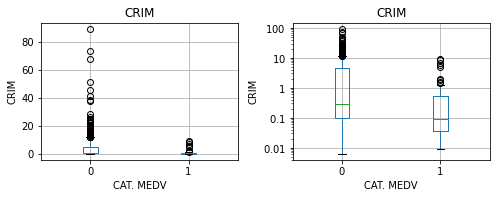

In [25]:
# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4
## scatter plot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
# regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])
# log scale
ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout(); plt.show()
## boxplot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT. MEDV', ax=axes[0])
ax.set_xlabel('CAT. MEDV'); ax.set_ylabel('CRIM')
# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT. MEDV',ax=axes[1])
ax.set_xlabel('CAT. MEDV'); ax.set_ylabel('CRIM');
ax.set_yscale('log')
# suppress the title
axes[0].get_figure().suptitle(""); plt.tight_layout();
plt.show()

Changing the scale in a display can enhance the plot and illuminate relationships.

## Aggregation and Hierarchies

For a temporal scale, we can aggregate by different granularity (e.g., monthly, daily, hourly) or even by a “seasonal”
factor of interest such as month-of-year or day-of-week. A popular aggregation for time series is a moving average, where the average of neighboring values within a given window size is plotted. Moving average plots enhance visualizing a global trend (see Chapter 16).

Non-temporal variables can be aggregated if some meaningful hierarchy exists: geographical (tracts within a zip code in the Boston Housing example), organizational (people within departments within units), etc.

,Ridership
Month,
1991-01-01,1708.917
1991-02-01,1620.586
1991-03-01,1972.715
1991-04-01,1811.665
1991-05-01,1974.964
...,...
2003-11-01,2076.054
2003-12-01,2140.677
2004-01-01,1831.508


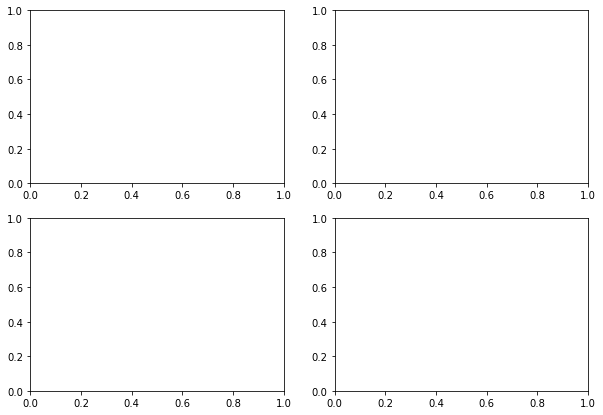

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
Amtrak_df = pd.read_csv('Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.set_index('Month', inplace=True)
Amtrak_df

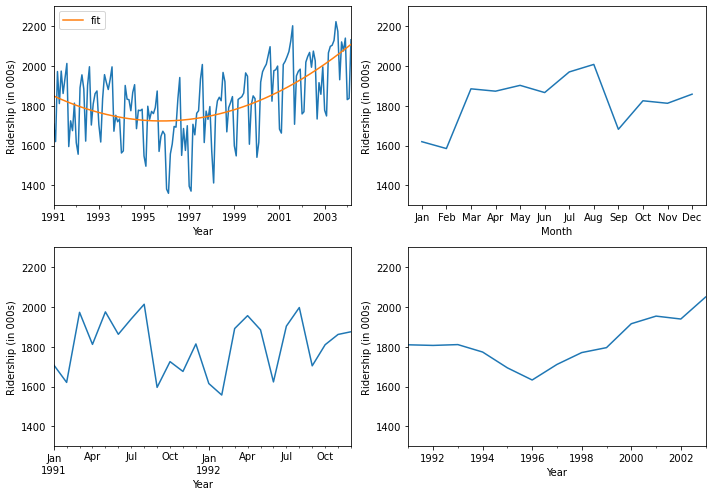

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
Amtrak_df = pd.read_csv('Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.set_index('Month', inplace=True)
                                    
# fit quadratic curve and display
quadraticFit = np.poly1d(np.polyfit(range(len(Amtrak_df)),Amtrak_df.Ridership, 2))
Amtrak_fit = pd.DataFrame({'fit' : [quadraticFit(t) for t in range(len(Amtrak_df))]})
Amtrak_fit.index = Amtrak_df.index
ax = Amtrak_df.plot(ylim=[1300, 2300], legend=False, ax=axes[0][0])
Amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)') #set x and y-axis label
                                    
# Zoom in 2-year period 1/1/1991 to 12/1/1992
ridership_2yrs = Amtrak_df.loc['1991-01-01':'1992-12-01']
ax = ridership_2yrs.plot(ylim=[1300, 2300], legend=False, ax=axes[1][0])
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)') #set x and y-axis label
                                    
# Average by month
byMonth = Amtrak_df.groupby(by=[Amtrak_df.index.month]).mean()
ax = byMonth.plot(ylim=[1300, 2300], legend=False, ax=axes[0][1])
ax.set_xlabel('Month'); ax.set_ylabel('Ridership (in 000s)') # set x and y-axis label
yticks = [-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0]
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1,13)]);
                                    
# Average by year (exclude data from 2004)
byYear = Amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='A')).mean()
ax = byYear.plot(ylim=[1300, 2300], legend=False, ax=axes[1][1])
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)') #set x and y-axis label
plt.tight_layout()
plt.show()

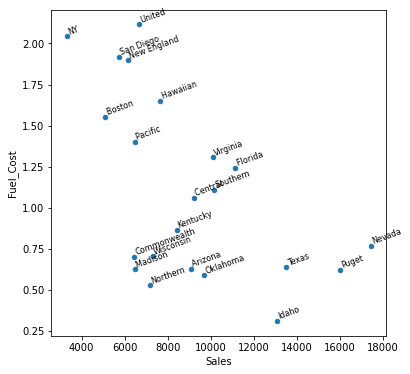

In [27]:
utilities_df = pd.read_csv('Utilities.csv')
ax = utilities_df.plot.scatter(x='Sales', y='Fuel_Cost', figsize=(6, 6))
points = utilities_df[['Sales','Fuel_Cost','Company']]
_ = points.apply(lambda x: ax.text(*x, rotation=20, horizontalalignment='left', verticalalignment='bottom', fontsize=8),axis=1)

# Specialized Visualizations

## Visualizing Networked Data

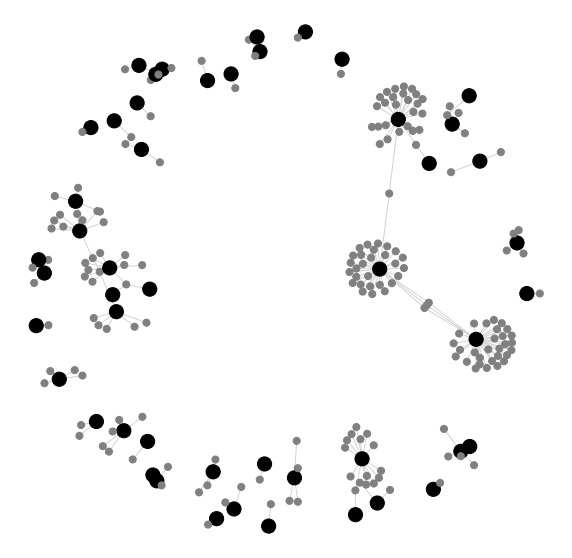

In [28]:
ebay_df = pd.read_csv('eBayNetwork.csv')
G = nx.from_pandas_edgelist(ebay_df, source='Seller',
target='Bidder')
isBidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
edge_color='lightgray',
node_color=['gray' if bidder else 'black' for
bidder in isBidder],
node_size=[50 if bidder else 200 for bidder
in isBidder])
plt.axis('off')
plt.show()

## Treemap

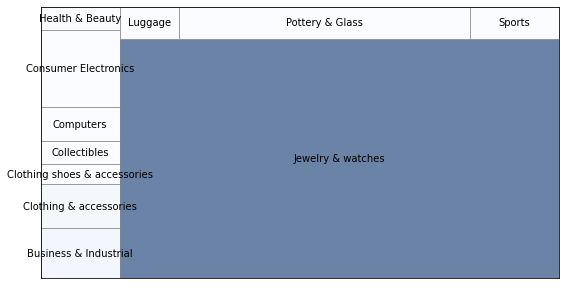

In [29]:
! pip install squarify
import squarify
import matplotlib
ebayTreemap = pd.read_csv('EbayTreemap.csv')
grouped = []
for category, df in ebayTreemap.groupby(['Category']): 
    negativeFeedback = sum(df['Seller Feedback'] < 0) / len(df)
    grouped.append({
        'category': category,
        'negativeFeedback': negativeFeedback,
        'averageBid': df['High Bid'].mean()
    })
byCategory = pd.DataFrame(grouped)
norm = matplotlib.colors.Normalize(
    vmin=byCategory.negativeFeedback.min(),
    vmax=byCategory.negativeFeedback.max()
)
colors = [matplotlib.cm.Blues(norm(value)) for value in byCategory.negativeFeedback]
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
squarify.plot(label=byCategory.category, sizes=byCategory.averageBid, color=colors, ax=ax, alpha=0.6, edgecolor='grey')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.subplots_adjust(left=0.1)
plt.show()